<a href="https://colab.research.google.com/github/Rush231/zona_riesgo/blob/main/zonas_de_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importamos todo lo necesario y verificamos las columnas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Paso 2: Cargar el conjunto de datos (supongamos que se llama 'data.csv')
data = pd.read_csv('/content/drive/MyDrive/crimenes/Crimenes.csv')  # Asegúrate de ajustar el nombre del archivo y la ruta


# Mostrar las columnas del DataFrame
columnas = data.columns
print("Columnas en el archivo CSV:")
print(columnas)


Columnas en el archivo CSV:
Index(['Estado', 'Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones'], dtype='object')


seleccionamos los datos y elegi el tipo de clustering con el cual vamos a realizar el entrenamiento, elegi k-means ya que es con el que mejor manejo, funciona con grandes cantidades de datos y es muy facil de interpretar los resultados que da, puede crear clusters especificos y  puede manejar conjuntos de datos con muchas caracteristicas.

Luego de hacer el entrenamiento kmeans realice una visualizacion de los datos,  de los asesinatos, asaltos y violaciones respecto a la poblacion para hacer un rapido analisis de lo que estoy realizando.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


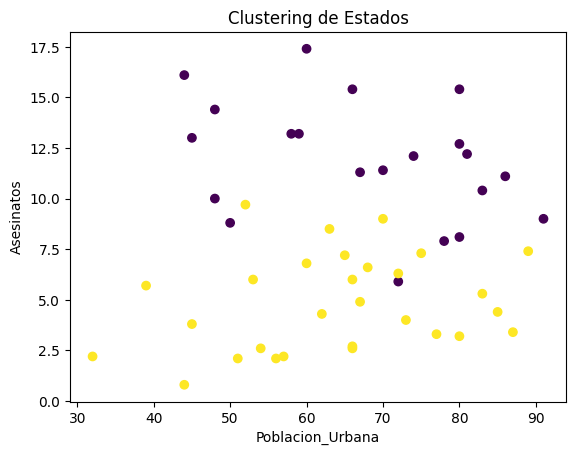

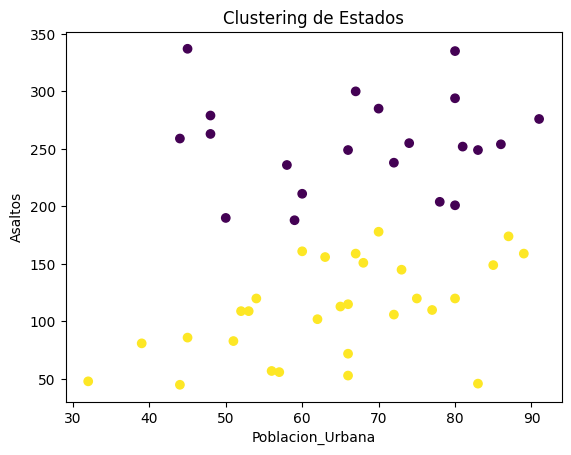

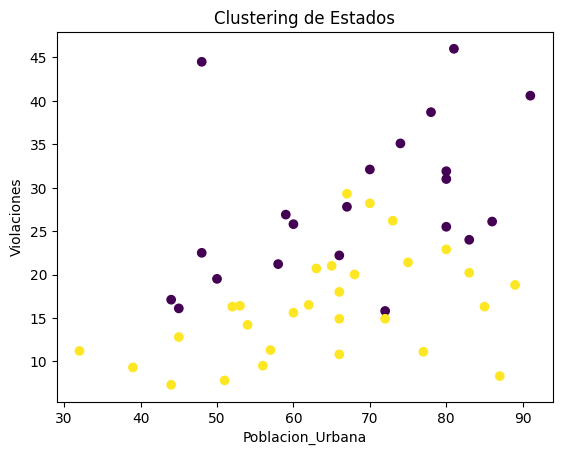

         Asesinatos     Asaltos  Poblacion Urbana  Violaciones
Cluster                                                       
0         11.857143  255.000000         67.619048    28.114286
1          4.841379  109.758621         64.034483    16.248276


<ipython-input-77-e4b36ba0eb35>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


In [ ]:

# Seleccionar características relevantes para el clustering
features = data[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]


# Elección del Algoritmo de Clustering y Entrenamiento del Modelo
# se elige K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)
data['Cluster'] = kmeans.labels_

# Interpretación de Resultados

plt.scatter(data['Poblacion Urbana'], data['Asesinatos'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Poblacion_Urbana')
plt.ylabel('Asesinatos')
plt.title('Clustering de Estados')
plt.show()


plt.scatter(data['Poblacion Urbana'], data['Asaltos'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Poblacion_Urbana')
plt.ylabel('Asaltos')
plt.title('Clustering de Estados')
plt.show()

plt.scatter(data['Poblacion Urbana'], data['Violaciones'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Poblacion_Urbana')
plt.ylabel('Violaciones')
plt.title('Clustering de Estados')
plt.show()


#reviso el cluster
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

En esta parte creo una categoria nueva llamada categoria_riesgo para poder ver de mejor manera como  se clasifican cada estado y su tipo de riesgo.

In [ ]:
# Clasificamos los datos para ver de mejor manera cuales estados tienen mayor o baja peligrosidad
data['Categoria_Riesgo'] = data['Cluster'].map({1: 'Baja Peligrosidad', 0: 'Alta Peligrosidad'})

# Mostrar los estados y sus respectivas categorías de riesgo
print(data[['Estado', 'Categoria_Riesgo']])

            Estado   Categoria_Riesgo
0          Alabama  Alta Peligrosidad
1           Alaska  Alta Peligrosidad
2          Arizona  Alta Peligrosidad
3         Arkansas  Alta Peligrosidad
4       California  Alta Peligrosidad
5         Colorado  Alta Peligrosidad
6      Connecticut  Baja Peligrosidad
7         Delaware  Alta Peligrosidad
8          Florida  Alta Peligrosidad
9          Georgia  Alta Peligrosidad
10          Hawaii  Baja Peligrosidad
11           Idaho  Baja Peligrosidad
12        Illinois  Alta Peligrosidad
13         Indiana  Baja Peligrosidad
14            Iowa  Baja Peligrosidad
15          Kansas  Baja Peligrosidad
16        Kentucky  Baja Peligrosidad
17       Louisiana  Alta Peligrosidad
18           Maine  Baja Peligrosidad
19        Maryland  Alta Peligrosidad
20   Massachusetts  Baja Peligrosidad
21        Michigan  Alta Peligrosidad
22       Minnesota  Baja Peligrosidad
23     Mississippi  Alta Peligrosidad
24        Missouri  Baja Peligrosidad
25         M

En esta parte seria lo mismo la parte anterior, pero desde  un grafico, donde se puede ver que en cada estado tiene un punto en la iazquierda o derecha, donde en la izquierda  se trata sobre una zona peligrosa y la derecha es de bajo riesgo

In [ ]:
# Ejemplo de visualización: Diagrama de dispersión (scatter plot) para ver la relación entre asesinatos y población urbana
plt.figure(figsize=(8, 16))
sns.scatterplot(x='Categoria_Riesgo', y='Estado', data=data)
plt.title('Relación entre Asesinatos y Estado')
plt.xlabel('Asesinatos')
plt.ylabel('Estado')
plt.show()


# Calcular la cantidad de estados en cada categoría de riesgo
count_states = data['Categoria_Riesgo'].value_counts()

# Mostrar el número de estados en cada categoría
print(count_states)

# Calcular el promedio de estados en baja y alta peligrosidad
promedio_baja_peligrosidad = count_states['Baja Peligrosidad'] / len(data)
promedio_alta_peligrosidad = count_states['Alta Peligrosidad'] / len(data)

# Mostrar el promedio de estados en cada categoría de riesgo
print(f"Promedio de estados en Baja Peligrosidad: {promedio_baja_peligrosidad * 100:.2f}%")
print(f"Promedio de estados en Alta Peligrosidad: {promedio_alta_peligrosidad * 100:.2f}%")

para finalizar podemos ver como el promedio de que hay mas estados con bajo riesgo con 8 estados de diferencia, por lo tanto el pais aunque tenga algunos estados con bajo riesgo, la gran mayoria son peligrosos.